In [63]:
import altair as alt
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

data = pd.read_csv('fulldata_clean.csv', index_col=1)
data = data.reset_index()

In [15]:
data.head(2)

,subreddit,Unnamed: 0,subreddit_subscribers,title,id,author,created_utc,num_comments,score,selftext,url,upvote_ratio,clean_title,clean_selftext
0,singapore,1,378959,"About 71,600 in S'pore have psychotic disorder...",nhxjoa,MicrotechAnalysis,2021-05-22,36,117,NaN,https://www.straitstimes.com/singapore/health/...,0.96,spore psychotic disorder say study,NaN
1,askSingapore,2,44675,Anyone know where to get tested as an Adult fo...,ng6k8b,summerfellxx,2021-05-19,6,8,I know mostly these tests are for children. Bu...,https://www.reddit.com/r/askSingapore/comments...,0.84,anyone know get tested adult auditory processi...,know mostly test child really need know wrong ...


In [16]:
data.shape

(18317, 14)

### Trend Analysis

In [64]:
date_count = data.groupby('created_utc')['created_utc'].count().to_frame()
date_count = date_count.rename(columns={'created_utc': 'count'})
date_count = date_count.reset_index()

In [65]:
alt.renderers.enable('default') 

selection = alt.selection_multi(fields=['count'], bind='legend')

trend = alt.Chart(date_count, title="Reddit Overall Trend").mark_line().encode(
    x=alt.X(
        "created_utc:T",
        axis=alt.Axis(title="created_utc")
    ),
    y='count',
).properties(
    width=800,
    height=400
).configure_axisX(
    labelAngle=-45,
).interactive().add_selection(
    selection
)

trend

alt.Chart(...)

In [68]:
data['created_utc'] = data['created_utc'].astype('datetime64[ns]')

In [18]:
year_count = data.groupby(data['created_utc'].dt.year).size().reset_index()

In [19]:
year_count = year_count.rename(columns={0:'count'})
year_count

,created_utc,count
0,2016,3
1,2017,63
2,2018,122
3,2019,1431
4,2020,11094
5,2021,5604


[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Count')]

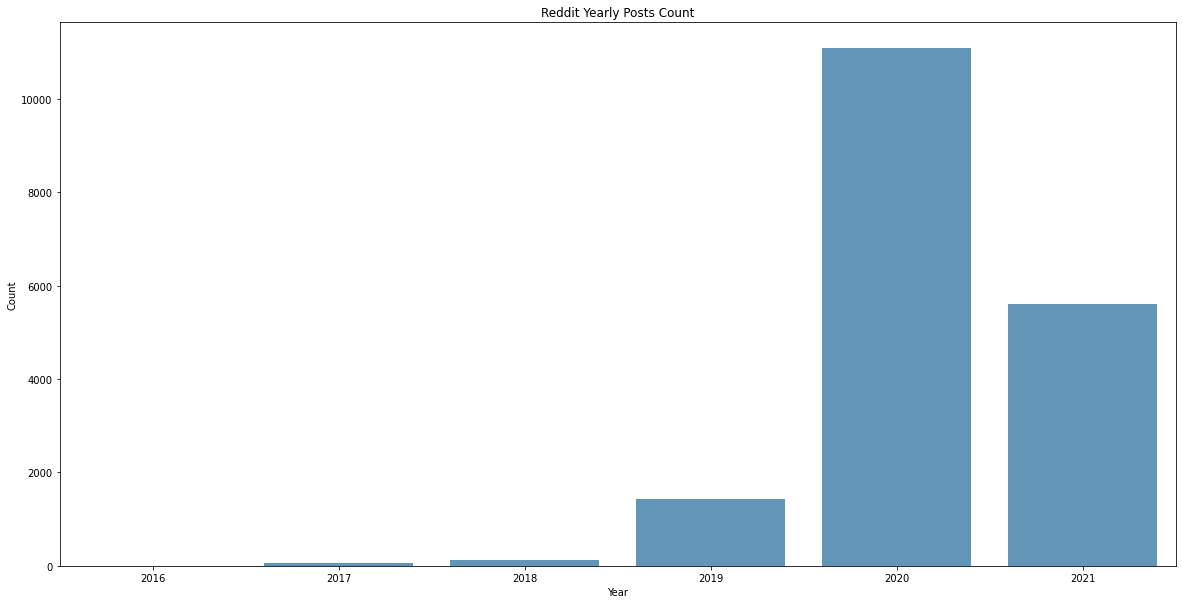

In [62]:
fig_1 = plt.figure(figsize=(20, 10))
ax1 = sns.barplot(x="created_utc", y="count", data=year_count, ci = None, color='#5499c7')
ax1.set_title('Reddit Yearly Posts Count')
ax1.set(xlabel='Year', ylabel='Count')      

In [21]:
'Start Date', min(data['created_utc'])

('Start Date', Timestamp('2016-08-16 00:00:00'))

In [22]:
'End Date', max(data['created_utc'])

('End Date', Timestamp('2021-06-30 00:00:00'))

In [82]:
data['month'] = data['created_utc'].dt.month
data['year'] = data['created_utc'].dt.year
data['day'] = data['created_utc'].dt.day_name()
data['day_number'] = data['created_utc'].dt.dayofweek

In [53]:
monthly_count = data.groupby([data['year'], data['month']]).size().reset_index()
monthly_count = monthly_count.rename(columns={0:'count'})
monthly_count

,year,month,count
0,2016,8,2
1,2016,12,1
2,2017,1,5
3,2017,2,2
4,2017,3,2
5,2017,4,8
6,2017,5,3
7,2017,6,9
8,2017,7,4
9,2017,8,4


[Text(0.5, 0, 'Month'), Text(0, 0.5, 'Count')]

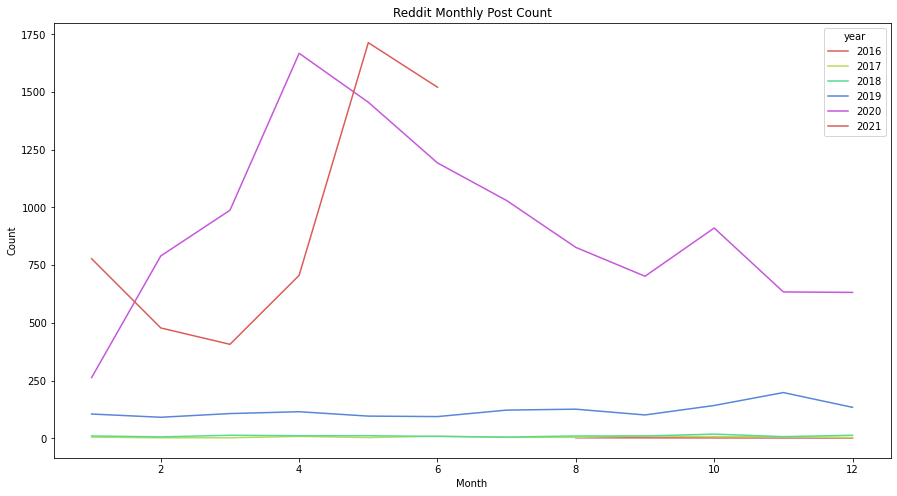

In [72]:
fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x="month", y="count", data=monthly_count,  hue="year", palette = 'hls') 
ax.set_title('Reddit Monthly Post Count')
ax.set(xlabel='Month', ylabel='Count')

In [111]:
before_pandemic_day_count = data[data['year']<2020].groupby([data['day_number'], data['day']]).size().reset_index()
before_pandemic_day_count = before_pandemic_day_count.rename(columns={0:'count'})
before_pandemic_day_count['is_pandemic'] = False

In [112]:
pandemic_day_count = data[data['year']>2019].groupby([data['day_number'], data['day']]).size().reset_index()
pandemic_day_count = pandemic_day_count.rename(columns={0:'count'})
pandemic_day_count['is_pandemic'] = True

In [113]:
overall_day_trend = pd.concat([before_pandemic_day_count, pandemic_day_count])
overall_day_trend

,day_number,day,count,is_pandemic
0,0,Monday,230,False
1,1,Tuesday,256,False
2,2,Wednesday,229,False
3,3,Thursday,242,False
4,4,Friday,259,False
5,5,Saturday,193,False
6,6,Sunday,210,False
0,0,Monday,2542,True
1,1,Tuesday,2575,True
2,2,Wednesday,2544,True


[Text(0.5, 0, 'Day of Week'), Text(0, 0.5, 'Count')]

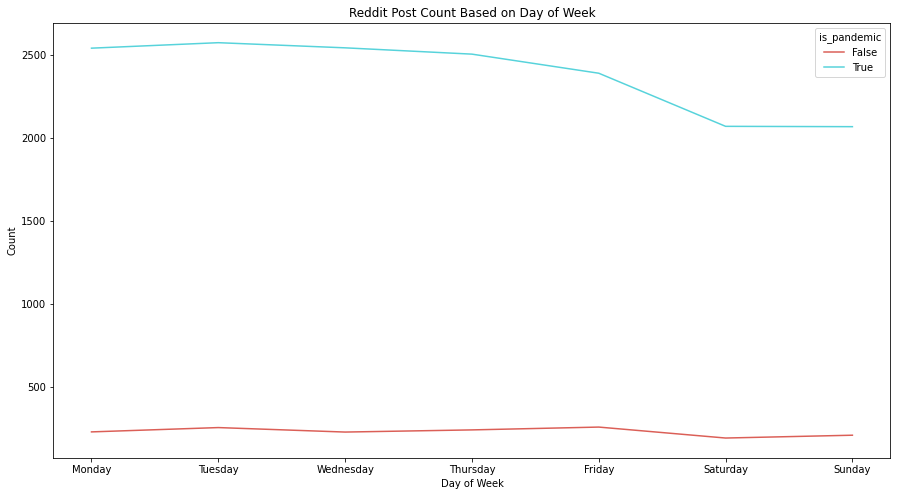

In [114]:
fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x="day", y="count", data=overall_day_trend,  hue="is_pandemic", palette = 'hls') 
ax.set_title('Reddit Post Count Based on Day of Week')
ax.set(xlabel='Day of Week', ylabel='Count')

[Text(0.5, 0, 'Day of Week'), Text(0, 0.5, 'Count')]

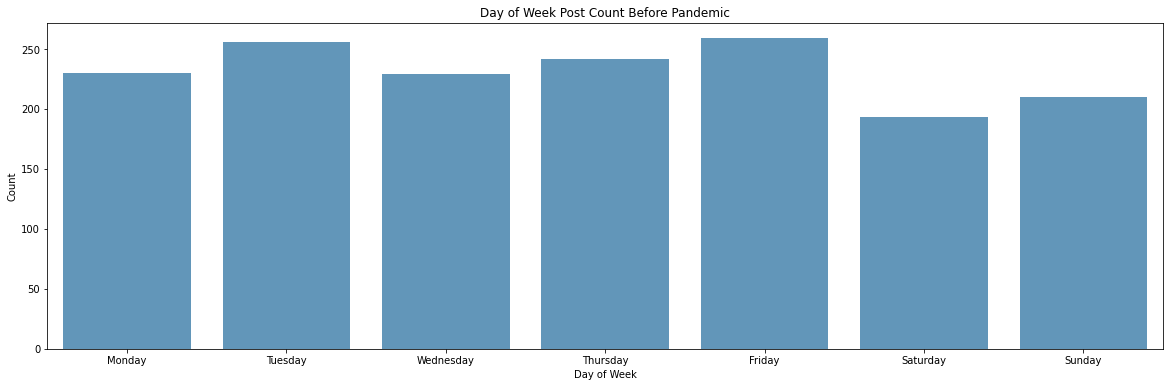

In [115]:
fig_1 = plt.figure(figsize=(20, 6))
ax1 = sns.barplot(x="day", y="count", data=before_pandemic_day_count, ci = None, color='#5499c7')
ax1.set_title('Day of Week Post Count Before Pandemic')
ax1.set(xlabel='Day of Week', ylabel='Count')    

[Text(0.5, 0, 'Day of Week'), Text(0, 0.5, 'Count')]

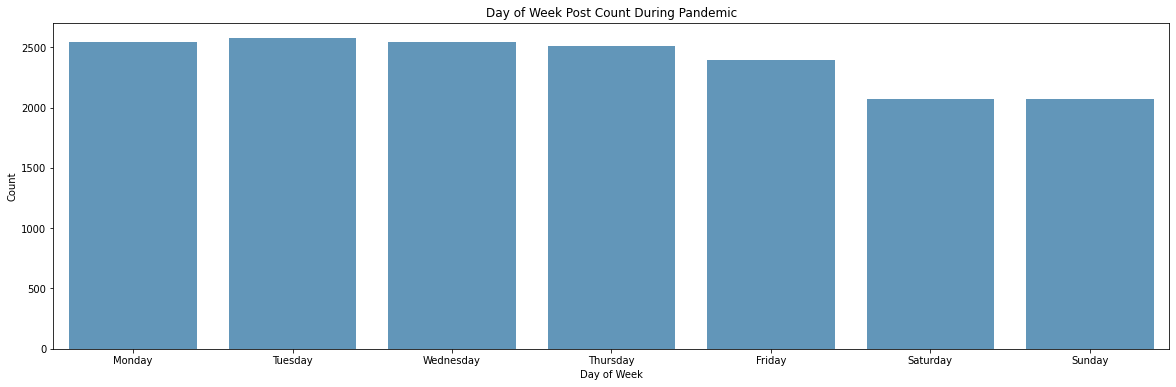

In [116]:
fig_1 = plt.figure(figsize=(20, 6))
ax1 = sns.barplot(x="day", y="count", data=pandemic_day_count, ci = None, color='#5499c7')
ax1.set_title('Day of Week Post Count During Pandemic')
ax1.set(xlabel='Day of Week', ylabel='Count')    

### Subreddit

In [117]:
subreddit = data.groupby('subreddit').size().reset_index()
subreddit = subreddit.rename(columns={0:'count'})
subreddit

,subreddit,count
0,MentalHealthSG,86
1,NTU,315
2,NationalServiceSG,592
3,SGExams,3760
4,SMU_Singapore,1
5,SingaporePoly,14
6,SingaporeRaw,551
7,askSingapore,1754
8,nus,545
9,singapore,10556


[Text(0.5, 0, 'subreddit'), Text(0, 0.5, 'Count')]

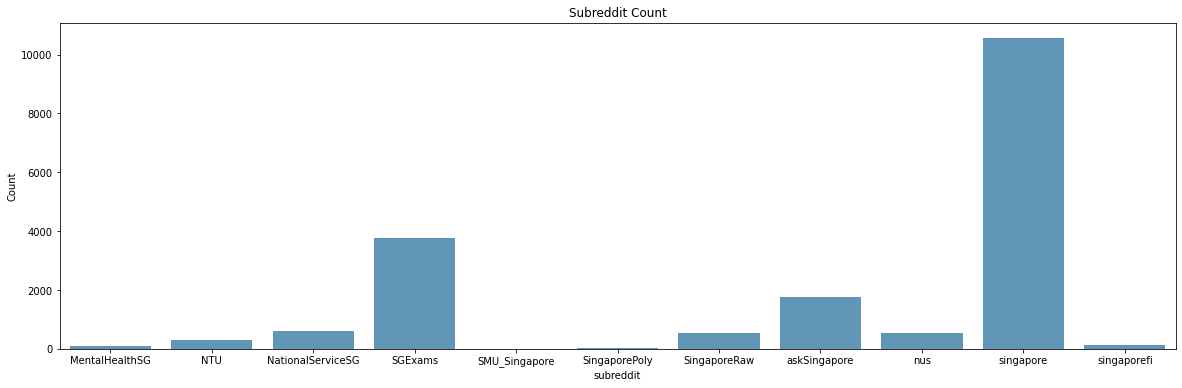

In [118]:
fig_1 = plt.figure(figsize=(20, 6))
ax1 = sns.barplot(x="subreddit", y="count", data=subreddit, ci = None, color='#5499c7')
ax1.set_title('Subreddit Count')
ax1.set(xlabel='subreddit', ylabel='Count')    

In [119]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
 

def sentiment_scores(sentence):
    sentence['positive'] = 0
    sentence['negative'] = 0
    sentence['neutral'] = 0
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(str(sentence['title'])+str(sentence['selftext']))
    sentence['positive_percentage'] = sentiment_dict['pos']*100
    sentence['negative_percentage'] = sentiment_dict['neg']*100
    sentence['neutral_percentage'] = sentiment_dict['neu']*100
     
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        sentence['positive'] = 1
 
    elif sentiment_dict['compound'] <= - 0.05 :
        sentence['negative'] = 1
 
    else :
        sentence['neutral'] = 1
        
    return sentence

In [120]:
sentiment_analysis = data.apply(sentiment_scores, axis=1) 

In [121]:
sentiment_analysis_group = sentiment_analysis.groupby('created_utc')['positive', 'negative', 'neutral'].sum().reset_index()

<ipython-input-121-cb33425b550f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sentiment_analysis_group = sentiment_analysis.groupby('created_utc')['positive', 'negative', 'neutral'].sum().reset_index()


In [122]:
sentiment_analysis_df = sentiment_analysis_group[['positive', 'negative', 'neutral', 'created_utc']].melt(id_vars='created_utc')

In [123]:
sentiment_analysis_df.head(2)

,created_utc,variable,value
0,2016-08-16,positive,0
1,2016-08-19,positive,1


In [125]:
selection = alt.selection_multi(fields=['color'], bind='legend')

sentiment_trend = alt.Chart(sentiment_analysis_df, title='Overall Sentiment Analysis Trend').mark_line().encode(
        x=alt.X(
            "created_utc:T",
            axis=alt.Axis(title="created_utc")
        ),
        y='value',
        color='variable:N',
    ).properties(
        width=800,
        height=400
    ).configure_axisX(
        labelAngle=-45,
    ).interactive().add_selection(
        selection
    )

sentiment_trend

alt.Chart(...)

In [132]:
from empath import Empath

lexicon = Empath()
def empath_analysis(current_data):
    analysis = lexicon.analyze(str(current_data['title'])+" "+str(current_data['selftext']), normalize=True)
    
    for key, value in analysis.items():
        current_data[key] = value
        
    return current_data

In [134]:
empath = data.apply(lambda x: empath_analysis(x), axis=1)

In [135]:
empath.to_csv('Empath analysis.csv')

In [141]:
empath

,subreddit,Unnamed: 0,subreddit_subscribers,title,id,author,created_utc,num_comments,score,selftext,...,weapon,children,monster,ocean,giving,contentment,writing,rural,positive_emotion,musical
0,singapore,1,378959,"About 71,600 in S'pore have psychotic disorder...",nhxjoa,MicrotechAnalysis,2021-05-22,36,117,NaN,...,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,askSingapore,2,44675,Anyone know where to get tested as an Adult fo...,ng6k8b,summerfellxx,2021-05-19,6,8,I know mostly these tests are for children. Bu...,...,0.0,0.00,0.0,0.0,0.002433,0.000000,0.007299,0.0,0.000000,0.002433
2,singapore,3,378959,'She didn't even have time to grieve': Some do...,ksalf9,DrCalFun,2021-01-07,90,202,NaN,...,0.0,0.05,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
3,NationalServiceSG,4,11091,Help for adjustment disorder,mfnwal,ElijahThor00,2021-03-29,6,5,People say half the war is won when you report...,...,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
4,askSingapore,5,44675,Where to get assessed for eating disorders?,l0ac4u,kanicroquette,2021-01-19,9,42,"I might have an eating disorder, I don’t know ...",...,0.0,0.00,0.0,0.0,0.006849,0.006849,0.000000,0.0,0.003425,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18312,singapore,84051,159359,Influenza Vaccine,b0hzfi,wintersoju,2019-03-13,8,7,Are there different brands of the vaccine avai...,...,0.0,0.00,0.0,0.0,0.027778,0.000000,0.000000,0.0,0.027778,0.000000
18313,singapore,84071,158417,Parliament: Free opt-in cervical cancer vaccin...,axxk5x,dailyfield,2019-03-06,40,126,NaN,...,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
18314,singapore,84081,154905,"[ladies] HPV vaccination - y/n, experience, co...",ap5vn0,yummydubu,2019-02-10,20,1,Currently researching the vaccination and wond...,...,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
18315,singapore,84091,167257,93% of Sec 1 girls opt for free cervical cance...,blzm57,Jammy_buttons2,2019-05-08,33,152,NaN,...,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


In [ ]:
dic = {}

for x in data['Empath']:
    for key, value in x.items():
        if key in dic:
            dic[key] += value
        else:
            dic[key] = value
dic

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''
stopwords = set(STOPWORDS)
stopwords.add('im')
stopwords.add('one')
stopwords.add('people')
stopwords.add('even')
 
# iterate through the csv file
for columns, details in data.iterrows():
    val = str(details['title']) +" "+ str(details['selftext'])

    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
word_cloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(word_cloud)
plt.title('Overall Reddit Wordcloud')
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Positive Sentiment

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''
stopwords = set(STOPWORDS)
stopwords.add('im')
stopwords.add('one')
stopwords.add('people')
stopwords.add('even')
 
# iterate through the csv file
for columns, details in sentiment_analysis[sentiment_analysis['positive']==1].iterrows():
    val = str(details['title']) +" "+ str(details['selftext'])

    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
word_cloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(word_cloud)
plt.title('Reddit Positive Sentiment Wordcloud')
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Negative Sentiment

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''
stopwords = set(STOPWORDS)
stopwords.add('im')
stopwords.add('one')
stopwords.add('people')
stopwords.add('even')
 
# iterate through the csv file
for columns, details in sentiment_analysis[sentiment_analysis['negative']==1].iterrows():
    val = str(details['title']) +" "+ str(details['selftext'])

    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
word_cloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(word_cloud)
plt.title('Reddit Negative Sentiment Wordcloud')
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Neutral Sentiment

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''
stopwords = set(STOPWORDS)
stopwords.add('im')
stopwords.add('one')
stopwords.add('people')
stopwords.add('even')
 
# iterate through the csv file
for columns, details in sentiment_analysis[sentiment_analysis['neutral']==1].iterrows():
    val = str(details['title']) +" "+ str(details['selftext'])

    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
word_cloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(word_cloud)
plt.title('Reddit Neutral Sentiment Wordcloud')
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()